<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h1 align="center">Statistical Learning - 255381</h1>
<h3 align="center">Dr. Hoda Mohammadzade</h3>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>  Spring 2022</h5>

---

# Project - Phase_2b
<h4 align="center">Vahid Pourakbar     400205511</h4>


---
---

In [26]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import cv2
from sklearn import preprocessing, model_selection
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

import sys
sys.path.append(r'../')
import pickle
from utils import *
# from utils import dataset, max_length, pre_processing_dataset, zero_padding_data, \
#                     classification_report_plot, confusion_matrix_plot

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open(r'..\Phase_1\Phase1_train.npy', 'rb') as f:
    X = np.load(f)
    Y = np.load(f).astype(int)
    I = np.load(f).astype(int)

with open(r'..\Phase_1\Phase1_test.npy', 'rb') as f:
    X_test = np.load(f, allow_pickle=True)
    Y_test = np.load(f).astype(int)
    I_test = np.load(f).astype(int)

X_train = X.copy()
Y_train = Y.copy()
I_train = I.copy()

In [3]:
audio_max_len = max(max_length(X_train), max_length(X_test))

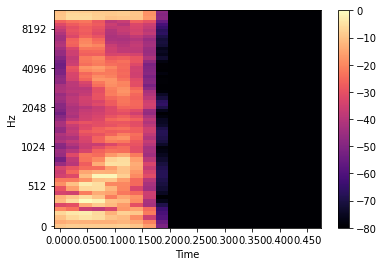

In [4]:
Sf1 = librosa.feature.melspectrogram(y=X[145], sr=8000, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
librosa.display.specshow(Df1, x_axis='time', y_axis='mel')
plt.colorbar()

## Part B,C

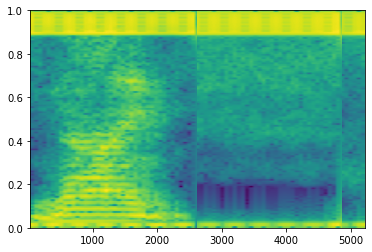

In [5]:
spec_train = []
spec_test = []
for xx in X_train:
    powerSpectrum, _, _, _ = plt.specgram(xx)
    img = cv2.resize(librosa.power_to_db(powerSpectrum, ref=np.max), dsize=(64,64))
    spec_train.append(img.flatten())
for xx in X_test:
    powerSpectrum, _, _, _ = plt.specgram(xx)
    img = cv2.resize(librosa.power_to_db(powerSpectrum, ref=np.max), dsize=(64,64))
    spec_test.append(img.flatten())

In [6]:
scaler = preprocessing.StandardScaler()
X2b_train = scaler.fit_transform(np.asarray(spec_train))
X2b_test = scaler.transform(np.asarray(spec_test))

pca = PCA()
X2b_train = pca.fit_transform(X2b_train)
X2b_test = pca.transform(X2b_test)

models = []
models.append(('LogR', LogisticRegression(solver='newton-cg')))
models.append(('LDA', LDA()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RFC', RFC()))

In [7]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True) 
    cross_val_results = model_selection.cross_val_score(model, X2b_train, Y_train, cv=kfold, scoring='accuracy')
    print(f'mean and std of the cross_val accuracies for {name}: {cross_val_results.mean()},\t{cross_val_results.std()}')

mean and std of the cross_val accuracies for LogR: 0.9145,	0.01603901493234543
mean and std of the cross_val accuracies for LDA: 0.27599999999999997,	0.05812916651733447
mean and std of the cross_val accuracies for KNN: 0.7495,	0.04040111384603154
mean and std of the cross_val accuracies for DTC: 0.4779999999999999,	0.028035691537752372
mean and std of the cross_val accuracies for SVM: 0.8524999999999998,	0.017356554957709797
mean and std of the cross_val accuracies for RFC: 0.643,	0.03132091952673166


In [8]:
for name, model in models:
    print(f'\tmodel = {name}:')
    train_accuracy, val_accuracy, test_accuracy = [], [], []
    kfold = model_selection.KFold(n_splits=5, shuffle=True) 
    for train_index, test_index in kfold.split(X2b_train):
        _model = model.fit(X2b_train[train_index], Y_train[train_index])
        train_accuracy.append(accuracy_score(Y_train[train_index], _model.predict(X2b_train[train_index])))
        val_accuracy.append(accuracy_score(Y_train[test_index], _model.predict(X2b_train[test_index])))
        test_accuracy.append(accuracy_score(Y_test, _model.predict(X2b_test)))
    msg = 'average accuracy of\t'
    msg += 'train = {:.5f}\t '.format(sum(train_accuracy)/len(train_accuracy))
    msg += 'validation = {:.5f}\t'.format(sum(val_accuracy)/len(val_accuracy))
    msg += 'test = {:.5f}\t'.format(sum(test_accuracy)/len(test_accuracy))
    print(msg)

	model = LogR:
average accuracy of	train = 1.00000	 validation = 0.90700	test = 0.90800	
	model = LDA:
average accuracy of	train = 0.17175	 validation = 0.22850	test = 0.10960	
	model = KNN:
average accuracy of	train = 0.84675	 validation = 0.73450	test = 0.74840	
	model = DTC:
average accuracy of	train = 1.00000	 validation = 0.47700	test = 0.41440	
	model = SVM:
average accuracy of	train = 0.93313	 validation = 0.84350	test = 0.83440	
	model = RFC:
average accuracy of	train = 1.00000	 validation = 0.62050	test = 0.51560	


In [10]:
for name, model in models:
    _model = model.fit(X2b_train, Y_train)
    print(f'model = {name}: train accuracy = {accuracy_score(Y_train, _model.predict(X2b_train))}', end='\t')
    print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X2b_test))}')

model = LogR: train accuracy = 1.0	test accuracy = 0.924
model = LDA: train accuracy = 0.193	test accuracy = 0.106
model = KNN: train accuracy = 0.8655	test accuracy = 0.774
model = DTC: train accuracy = 1.0	test accuracy = 0.398
model = SVM: train accuracy = 0.9415	test accuracy = 0.856
model = RFC: train accuracy = 1.0	test accuracy = 0.582


In [11]:
# performing LogR with grid search
print('Start GridSearch to optimize hyperparameters of LOGR, which already performed well with defualt parameters\n')
parameters = {'C':(100,10,1,0.5),'solver': ('newton-cg', 'lbfgs')} #'sag', 'liblinear', 'saga'
clf_GS = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, scoring='accuracy', cv=5)
clf_GS.fit(X2b_train,Y_train)
print(f'The best parameters for LogR accuracy: {clf_GS.best_params_}, with score = {clf_GS.best_score_}')

Start GridSearch to optimize hyperparameters of LOGR, which already performed well with defualt parameters

The best parameters for LogR accuracy: {'C': 100, 'solver': 'newton-cg'}, with score = 0.9139999999999999


In [12]:
_model = LogisticRegression(C=100, solver='newton-cg').fit(X2b_train, Y_train)
print(f'model = LogR: train accuracy = {accuracy_score(Y_train, _model.predict(X2b_train))}',end='\t')
print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X2b_test))}')

model = LogR: train accuracy = 1.0	test accuracy = 0.93


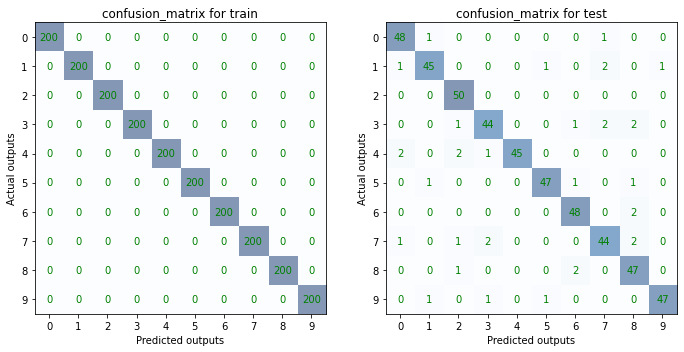

In [13]:
cm = [confusion_matrix(Y_train, _model.predict(X2b_train))]
cm.append(confusion_matrix(Y_test, _model.predict(X2b_test)))
confusion_matrix_plot(cm)

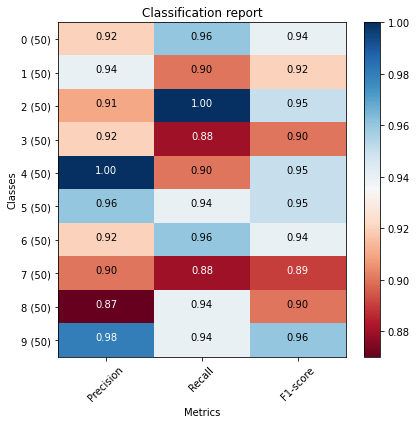

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



In [14]:
classification_report_plot(classification_report(Y_test, _model.predict(X2b_test)))

In [15]:
with open('Model_Phase2b.pkl', 'wb') as file:
    pickle.dump(_model, file)

## Part E

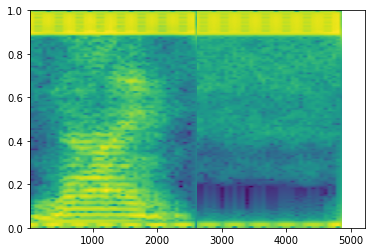

In [16]:
def Predict_Phase2(path_data=r'..\Dataset\test', path_model='Model_Phase2b.pkl'):
    with open(path_model , 'rb') as f:
        loaded_model = pickle.load(f)
    
    X2b_test, _, _, _ = dataset(path_data)
    audio_data_test = pre_processing_dataset(X2b_test)
    max_len = max(audio_max_len, max_length(audio_data_test))
    output_audio_test = np.asarray(zero_padding_data(audio_data_test, max_len))

    spect_test = []
    for xx in output_audio_test:
        powerSpectrum, _, _, _ = plt.specgram(xx)
        img = cv2.resize(librosa.power_to_db(powerSpectrum, ref=np.max), dsize=(64,64))
        spect_test.append(img.flatten())

    _X2b_test = scaler.transform(np.asarray(spect_test))
    _X2b_test = pca.transform(_X2b_test)

    with open('phase2b_predicted.npy', 'wb') as f:
        np.save(f, loaded_model.predict(_X2b_test))
    # print(f'test accuracy = {accuracy_score(Y_test, loaded_model.predict(_X2b_test))}')


Predict_Phase2() 

In [17]:
with open('Phase2b_spec_train.npy', 'wb') as f:
    np.save(f, np.asarray(spec_train))
    np.save(f, Y_train)
    np.save(f, I_train)
with open('Phase2b_spec_test.npy', 'wb') as f:
    np.save(f, np.asarray(spec_test))
    np.save(f, Y_test)
    np.save(f, I_test)

## Part F

In [18]:
models = []
models.append(('LogR', LogisticRegression(solver='newton-cg')))
models.append(('LDA', LDA()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RFC', RFC()))

### MFCC

In [23]:
mfcc_train = []
mfcc_test = []
for xx in X_train:
    mfcc_train.append(librosa.feature.mfcc(y=xx, sr=8000).flatten())
for xx in X_test:
    mfcc_test.append(librosa.feature.mfcc(y=xx, sr=8000).flatten())

scaler = preprocessing.StandardScaler()
X2b_train = scaler.fit_transform(np.asarray(mfcc_train))
X2b_test = scaler.transform(np.asarray(mfcc_test))

pca = PCA()
X2b_train = pca.fit_transform(X2b_train)
X2b_test = pca.transform(X2b_test)

In [20]:
for name, model in models:
    _model = model.fit(X2b_train, Y_train)
    print(f'model = {name}: train accuracy = {accuracy_score(Y_train, _model.predict(X2b_train))}', end='\t')
    print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X2b_test))}')

model = LogR: train accuracy = 1.0	test accuracy = 0.94
model = LDA: train accuracy = 0.9735	test accuracy = 0.88
model = KNN: train accuracy = 0.9715	test accuracy = 0.958
model = DTC: train accuracy = 1.0	test accuracy = 0.584
model = SVM: train accuracy = 0.9905	test accuracy = 0.966
model = RFC: train accuracy = 1.0	test accuracy = 0.922


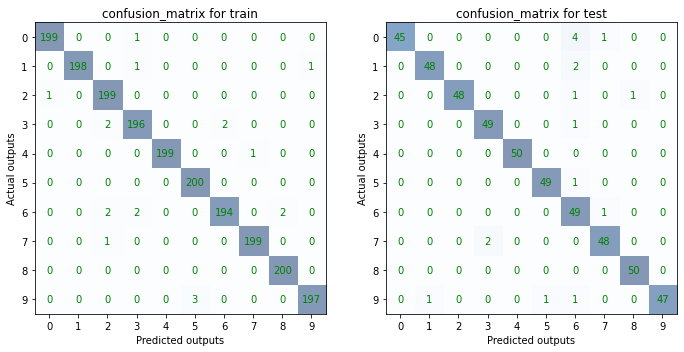

In [24]:
_model = SVC().fit(X2b_train, Y_train)
cm = [confusion_matrix(Y_train, _model.predict(X2b_train))]
cm.append(confusion_matrix(Y_test, _model.predict(X2b_test)))
confusion_matrix_plot(cm)

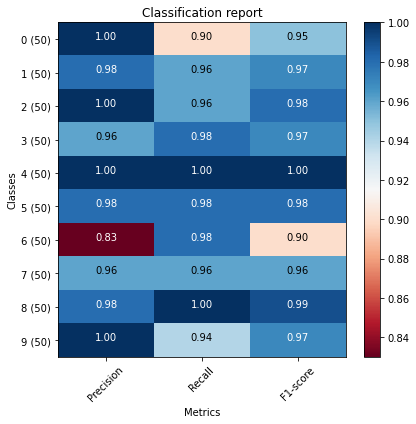

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [25]:
classification_report_plot(classification_report(Y_test, _model.predict(X2b_test)))

### Chroma

In [21]:
chroma_train = []
chroma_test = []
for xx in X_train:
    chroma_train.append(librosa.feature.chroma_stft(y=xx, sr=8000).flatten())
for xx in X_test:
    chroma_test.append(librosa.feature.chroma_stft(y=xx, sr=8000).flatten())

scaler = preprocessing.StandardScaler()
X2b_train = scaler.fit_transform(np.asarray(chroma_train))
X2b_test = scaler.transform(np.asarray(chroma_test))

pca = PCA()
X2b_train = pca.fit_transform(X2b_train)
X2b_test = pca.transform(X2b_test)

In [22]:
for name, model in models:
    _model = model.fit(X2b_train, Y_train)
    print(f'model = {name}: train accuracy = {accuracy_score(Y_train, _model.predict(X2b_train))}', end='\t')
    print(f'test accuracy = {accuracy_score(Y_test, _model.predict(X2b_test))}')

model = LogR: train accuracy = 0.6345	test accuracy = 0.424
model = LDA: train accuracy = 0.57	test accuracy = 0.144
model = KNN: train accuracy = 0.656	test accuracy = 0.492
model = DTC: train accuracy = 1.0	test accuracy = 0.266
model = SVM: train accuracy = 0.666	test accuracy = 0.496
model = RFC: train accuracy = 1.0	test accuracy = 0.492
